# Introduction

- Nama : Vittorio Damma Putra

- Batch : HCK 031

**Problem**

We are working 


# Import Libraries

In [1]:
# Data handling and manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# metric evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [2]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)

In [3]:
print("first 10 data:")
display(df.head(10))

first 10 data:


,Week,Pulau Pari: (Indonesia)
0,2022-03-27,16
1,2022-04-03,13
2,2022-04-10,18
3,2022-04-17,29
4,2022-04-24,35
5,2022-05-01,95
6,2022-05-08,62
7,2022-05-15,47
8,2022-05-22,35
9,2022-05-29,32


In [4]:
print("last 10 data:")
display(df.tail(10))

last 10 data:


,Week,Pulau Pari: (Indonesia)
116,2024-06-16,40
117,2024-06-23,45
118,2024-06-30,54
119,2024-07-07,33
120,2024-07-14,40
121,2024-07-21,43
122,2024-07-28,34
123,2024-08-04,32
124,2024-08-11,36
125,2024-08-18,29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Week                     126 non-null    object
 1   Pulau Pari: (Indonesia)  126 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [6]:
# checking duplicate columns
df.duplicated().sum()  

0

In [7]:
df.rename(columns={'Week': 'Date', 'Pulau Pari: (Indonesia)': 'Pulau_Pari'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        126 non-null    object
 1   Pulau_Pari  126 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [9]:
print("first 10 data:")
display(df.head(10))

first 10 data:


,Date,Pulau_Pari
0,2022-03-27,16
1,2022-04-03,13
2,2022-04-10,18
3,2022-04-17,29
4,2022-04-24,35
5,2022-05-01,95
6,2022-05-08,62
7,2022-05-15,47
8,2022-05-22,35
9,2022-05-29,32


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [11]:
df = df[['Pulau_Pari']]

In [12]:
df.head()

,Pulau_Pari
Date,
2022-03-27,16
2022-04-03,13
2022-04-10,18
2022-04-17,29
2022-04-24,35


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2022-03-27 to 2024-08-18
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pulau_Pari  126 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


In [14]:
df.index

DatetimeIndex(['2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17',
               '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15',
               '2022-05-22', '2022-05-29',
               ...
               '2024-06-16', '2024-06-23', '2024-06-30', '2024-07-07',
               '2024-07-14', '2024-07-21', '2024-07-28', '2024-08-04',
               '2024-08-11', '2024-08-18'],
              dtype='datetime64[ns]', name='Date', length=126, freq=None)

## Data Cleaning

### Check Date Frequent

In [15]:
# check data record freq
inferred_freq = pd.infer_freq(df.index)
print(inferred_freq)

W-SUN


### Handling Missing Value

In [18]:
# check missing value
df.isna().sum()

Pulau_Pari    0
dtype: int64

# Exploratory Data Analysis (EDA)

## Plotting the full time series

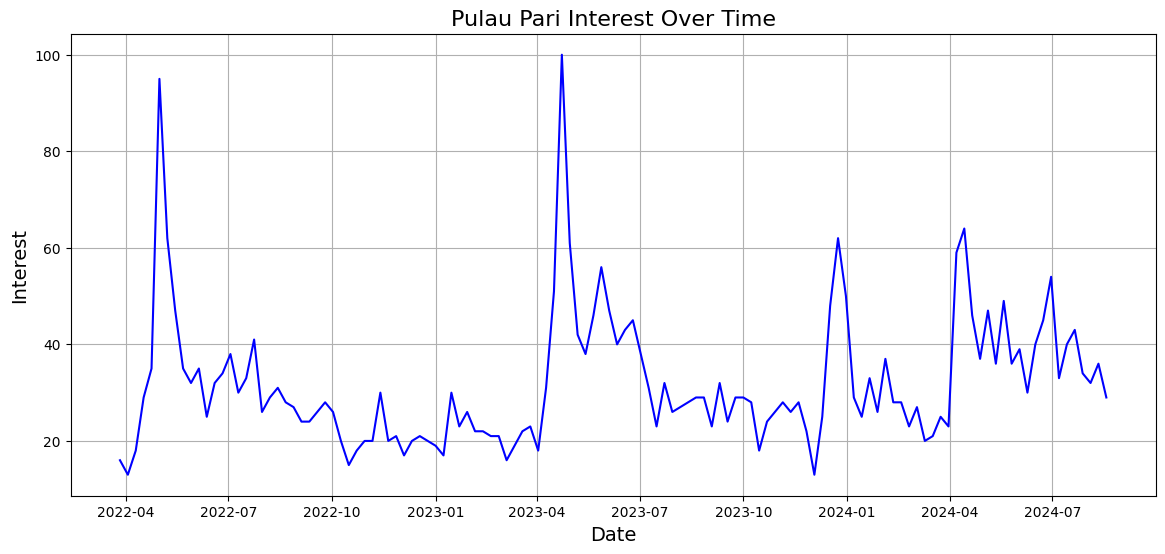

In [19]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Pulau_Pari'], color='blue')
plt.title('Pulau Pari Interest Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Interest', fontsize=14)
plt.grid(True)
plt.show()

## Decomposition

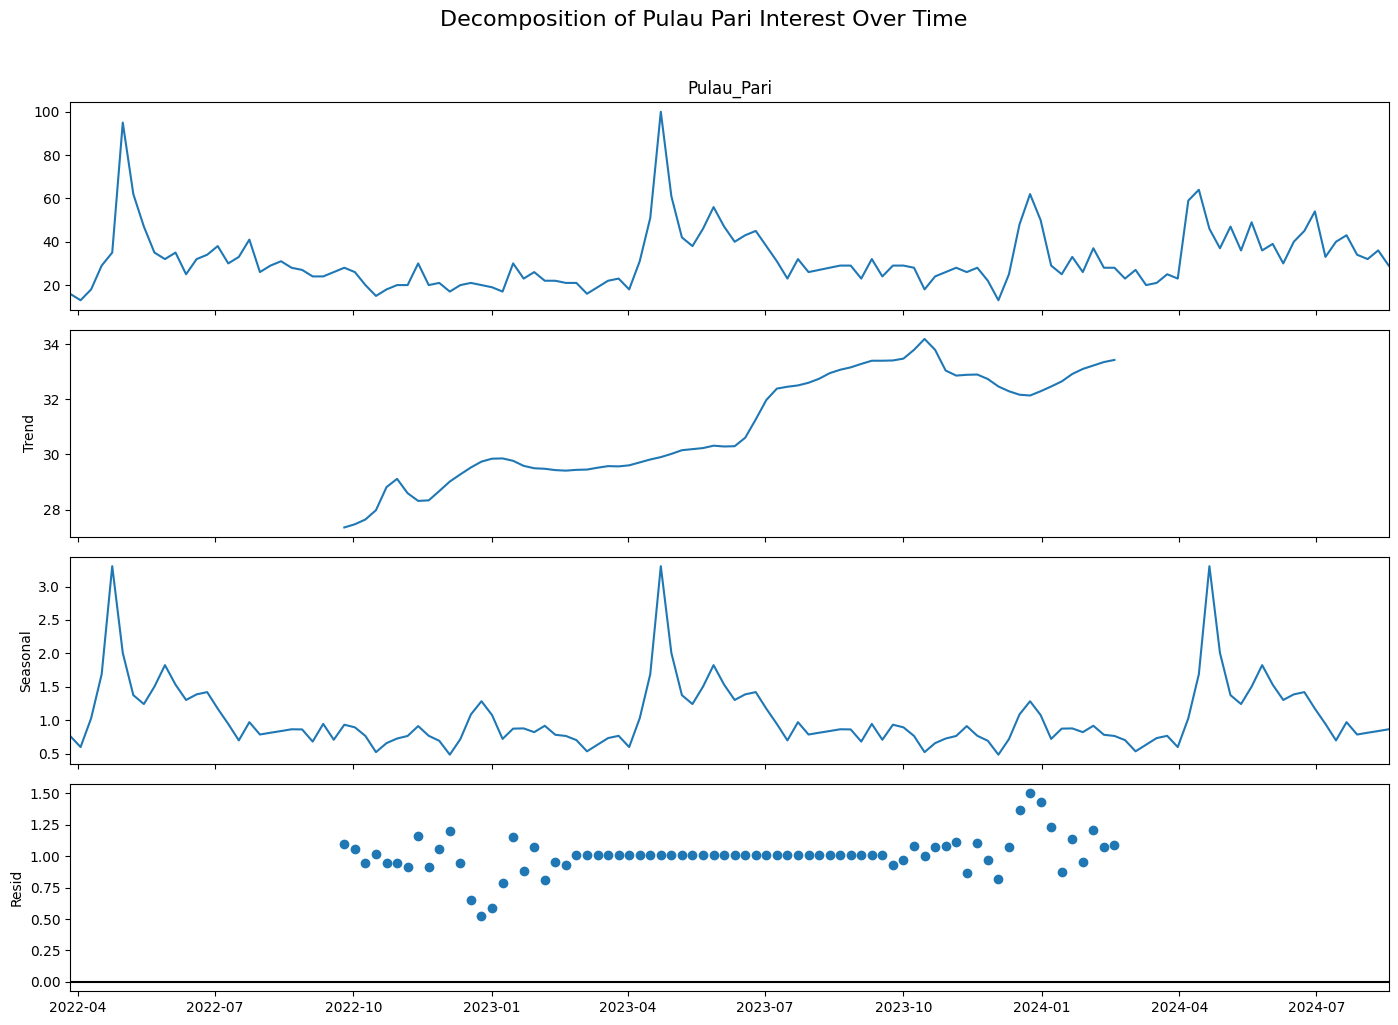

In [24]:
decomposition = seasonal_decompose(df['Pulau_Pari'], model='multiplicative', period=52)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Decomposition of Pulau Pari Interest Over Time', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

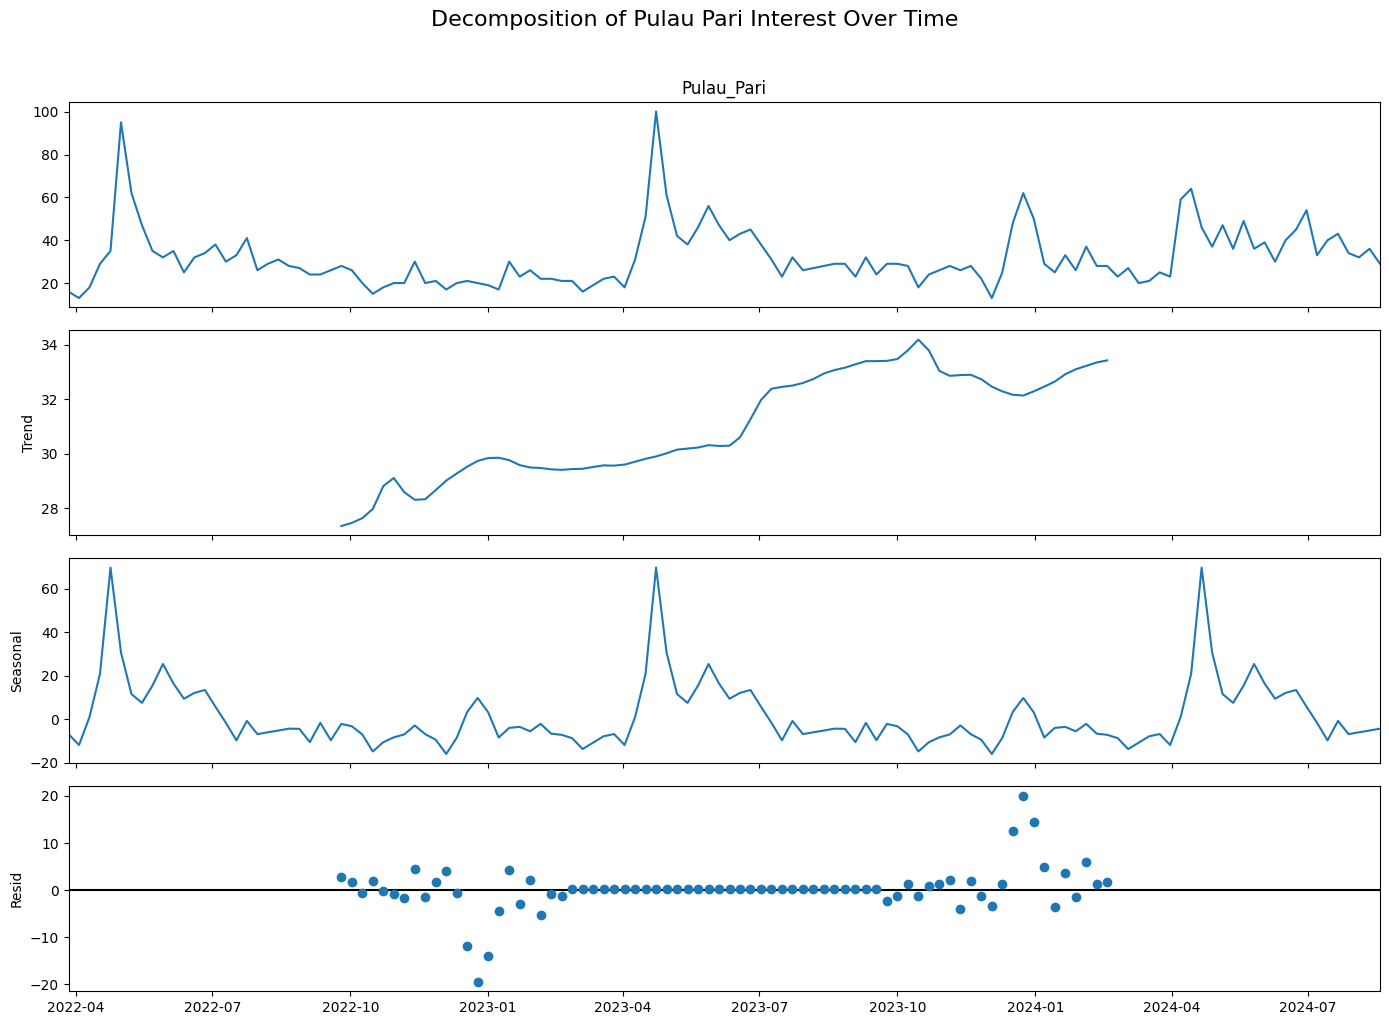

In [25]:
decomposition = seasonal_decompose(df['Pulau_Pari'], model='additive', period=52)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Decomposition of Pulau Pari Interest Over Time', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Data Splitting

### Splitting Process

In [26]:
# composition for train set
train_size = int(len(df) * 0.8)
train_size

100

In [27]:
# split train and test set
train = df[:train_size]
test = df[train_size:]

# show data size
print(f'train size : {len(train)}')
print(f'test size : {len(test)}')

train size : 100
test size : 26


### Visualization Train and Test Set

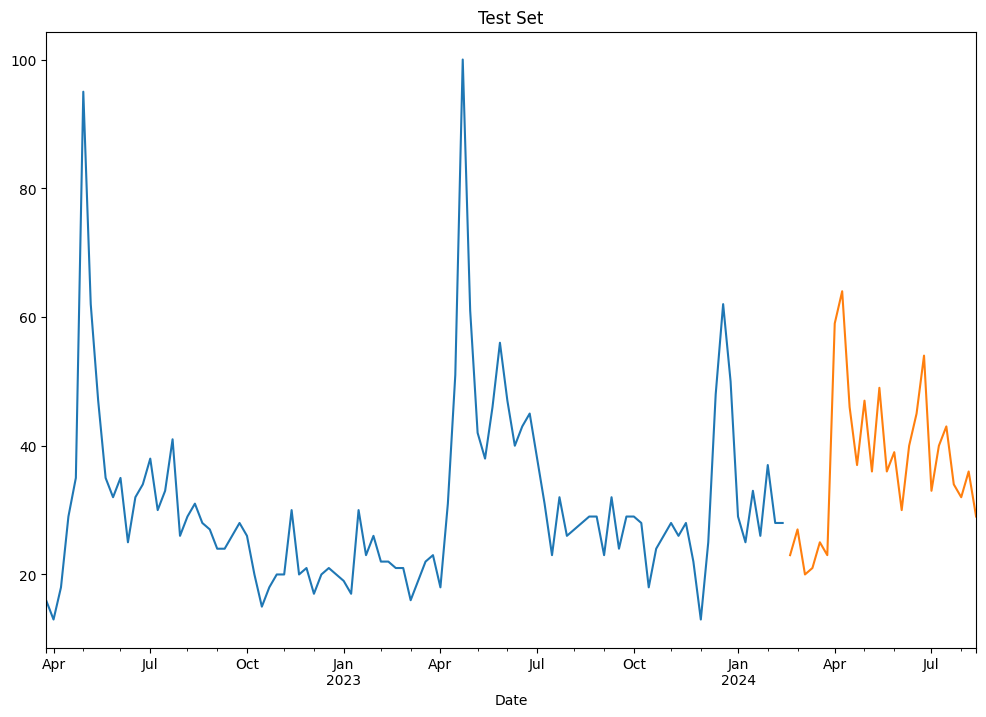

In [29]:
train['Pulau_Pari'].plot(figsize=(12, 8), title='Train Set')
test['Pulau_Pari'].plot(figsize=(12, 8), title='Test Set')
plt.show()

## Stationaire Test

In [30]:
def perform_adf_test(series: pd.Series, series_name: str = "the series"):
    """
    Performs and prints the results of the Augmented Dickey-Fuller test.

    Args:
        series (pd.Series): The time series data to test.
        series_name (str): A descriptive name for the data being tested.
    """
    print(f"--- ADF Test Results for: {series_name} ---")

    # Perform the ADF test
    result = adfuller(series.dropna()) # dropna() is important for differenced series

    # Print the main results
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Print the conclusion
    print('\n--- Conclusion ---')
    if result[1] <= 0.05:
        print("The data is likely stationary.")
    else:
        print("The data is likely non-stationary.")
    print("-" * 40)

### 1st Order Differencing

In [31]:
# check for 1st order differencing of train set
perform_adf_test(train['Pulau_Pari'].diff().dropna(), '1st Order Diff of Train Set')

--- ADF Test Results for: 1st Order Diff of Train Set ---
ADF Statistic: -8.411029195129654
p-value: 2.1036570821476276e-13
Critical Values:
	1%: -3.5003788874873405
	5%: -2.8921519665075235
	10%: -2.5830997960069446

--- Conclusion ---
The data is likely stationary.
----------------------------------------


### Visualize the Data

Text(0.5, 1.0, '1st Order Differencing')

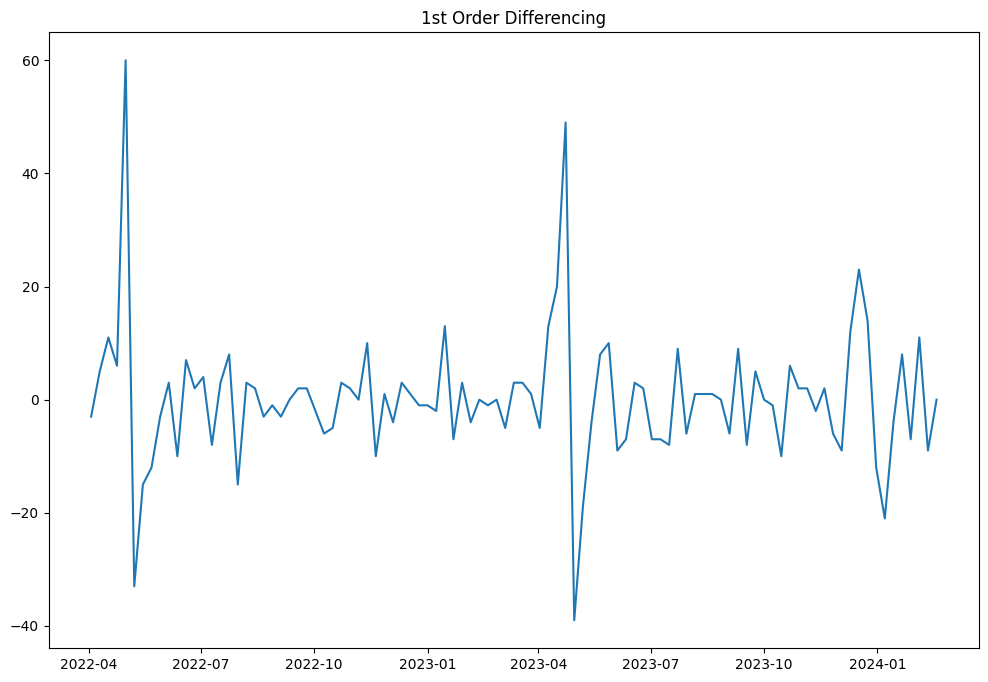

In [32]:
# visualize 1st order differencing
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train['Pulau_Pari'].diff().dropna())
ax.set_title('1st Order Differencing')

## ACF and PACF Plot Analysis

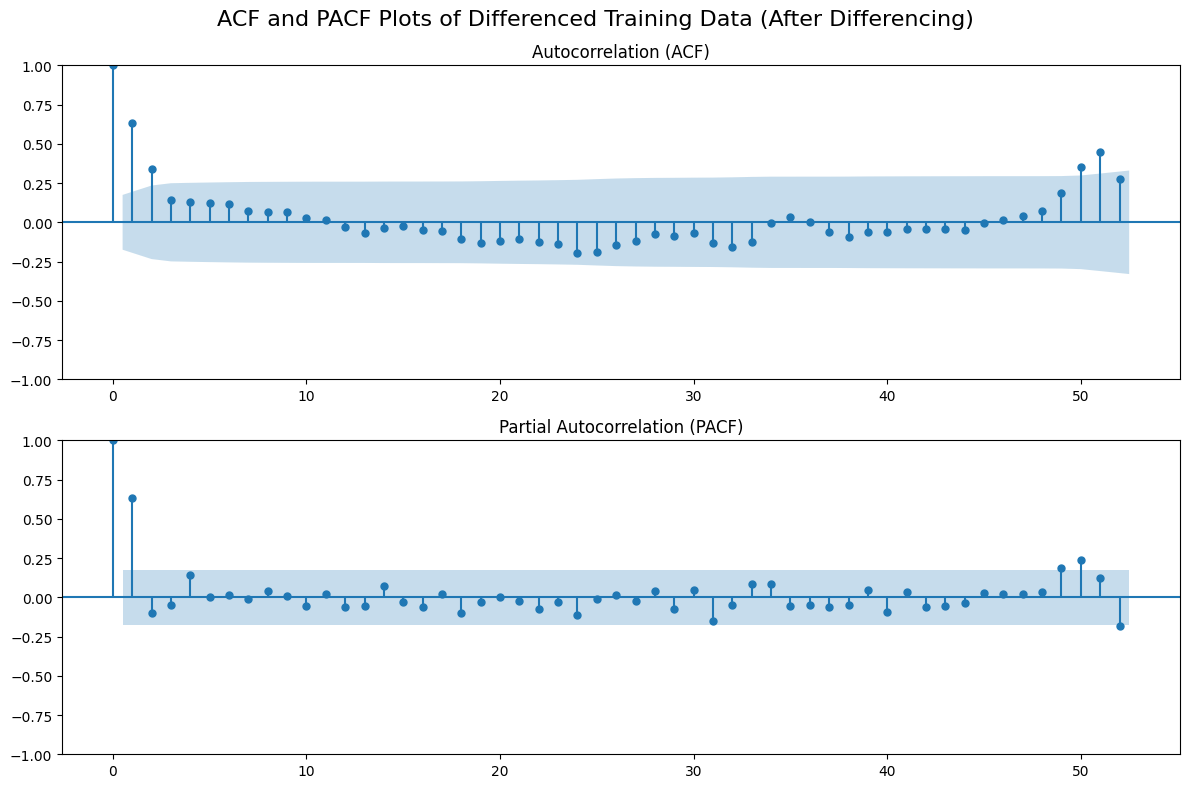

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle('ACF and PACF Plots of Differenced Training Data (After Differencing)', fontsize=16)
plot_acf(df['Pulau_Pari'], ax=ax1, lags=52)
ax1.set_title('Autocorrelation (ACF)')
plot_pacf(df['Pulau_Pari'], ax=ax2, lags=52)
ax2.set_title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()

## ARIMA

### Model Definition


In [34]:
# define ARIMA model
model = ARIMA(train['Pulau_Pari'], order=(3, 1, 3))

### Model Training

In [35]:
# train ARIMA model
model_fit = model.fit()

# show AIC score
print(model_fit.aic)

# show summary table
print(model_fit.summary())

764.241123519534
                               SARIMAX Results                                
Dep. Variable:             Pulau_Pari   No. Observations:                  100
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -375.121
Date:                Mon, 08 Sep 2025   AIC                            764.241
Time:                        11:03:25   BIC                            782.407
Sample:                    03-27-2022   HQIC                           771.591
                         - 02-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1251      0.277      0.452      0.652      -0.418       0.668
ar.L2         -0.3640      0.319     -1.139      0.255      -0.990       0.262
ar.L3          0.3405      0.247   

### Model Definition


**In this case we wil use MAE and MAPE**

In [36]:
# forecast the train set with arima
pred_train_arima = model_fit.predict(start=train.index[0], end=train.index[-1])

# insert forecast result into the train set dataframe
train['pred_arima'] = pred_train_arima

# show train set
train.head()

,Pulau_Pari,pred_arima
Date,,
2022-03-27,16,0.000000
2022-04-03,13,15.999817
2022-04-10,18,13.239083
2022-04-17,29,17.874230
2022-04-24,35,27.905145


**Visualize ARIMA**

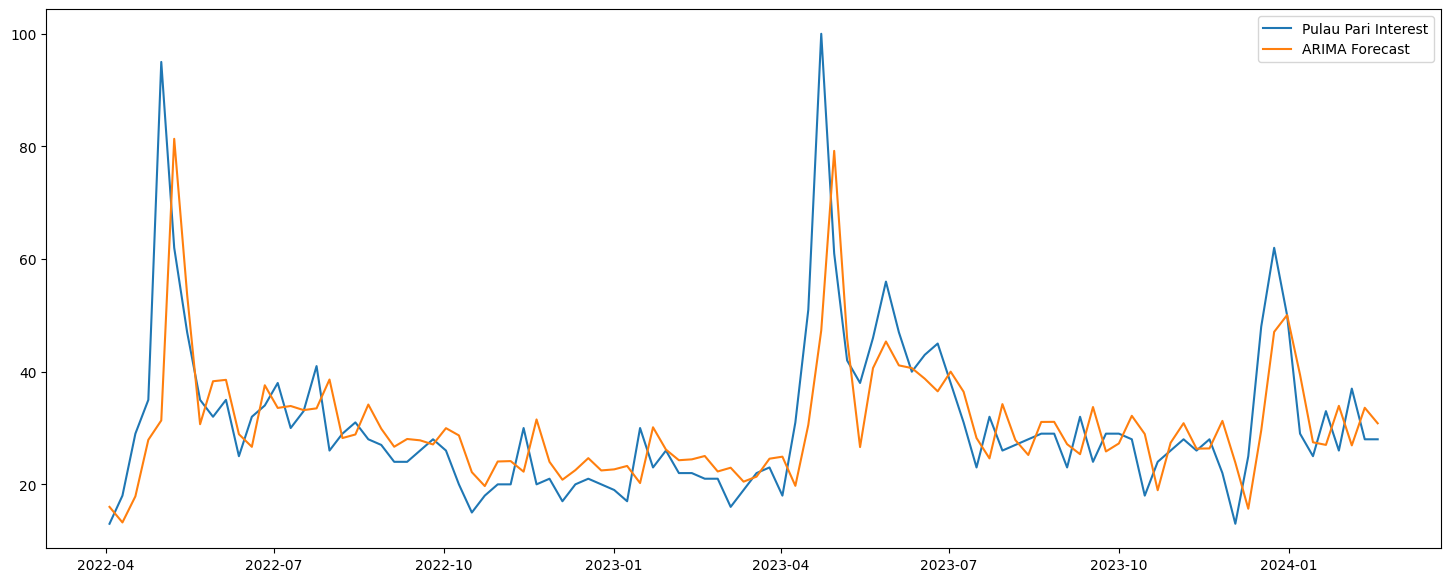

In [37]:
# visualize the train with the forcast result
fig, ax = plt.subplots(figsize=(18, 7))
ax.plot(train.iloc[1:,0], label='Pulau Pari Interest')
ax.plot(train.iloc[1:,1], label='ARIMA Forecast')
ax.legend()
plt.show()

**MAE and MAPE of Train-Test set**

In [38]:
# forecast for test set
pred_test_arima = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# add the result into test dataframe
test['pred_arima'] = pred_test_arima.values

test.head()

,Pulau_Pari,pred_arima
Date,,
2024-02-25,23,26.955830
2024-03-03,27,27.680180
2024-03-10,20,30.415369
2024-03-17,21,30.138414
2024-03-24,25,29.354891


In [40]:
# evaluate MAE and MAPE for Train and Test set
print('MAE Result')
print('=='*10)
print(f'Train MAE : {mean_absolute_error(train["Pulau_Pari"], train["pred_arima"])}')
print(f'Test MAE : {mean_absolute_error(test["Pulau_Pari"], test["pred_arima"])}\n')

print('MAPE Result')
print('=='*10)
print(f'Train MAPE : {mean_absolute_percentage_error(train["Pulau_Pari"], train["pred_arima"])}')
print(f'Test MAPE : {mean_absolute_percentage_error(test["Pulau_Pari"], test["pred_arima"])}')

MAE Result
Train MAE : 6.770281171533389
Test MAE : 10.07323769838117

MAPE Result
Train MAPE : 0.21567550109297107
Test MAPE : 0.24827483180045323


## SARIMA

### Model Definition

In [ ]:
# define SARIMA model
model = SARIMAX(train['Pulau_Pari'], order=(3, 1, 3), seasonal_order=(3, 1, 3, 21))